In [3]:
using DelimitedFiles
using PyCall
using PyPlot
using Statistics
using LaTeXStrings
using DataFrames
using GLM


In [4]:
E_ref60 = readdlm("../data/figures/data_fig5/E_ref60.0")[:]
E_ref30 = readdlm("../data/figures/data_fig5/E_ref30.0")[:]
E_ref10 = readdlm("../data/figures/data_fig5/E_ref10.0")[:]
E_seq60 = readdlm("../data/figures/data_fig5/E_seq60.0")[:]
E_seq30 = readdlm("../data/figures/data_fig5/E_seq30.0")[:]
E_seq10 = readdlm("../data/figures/data_fig5/E_seq10.0")[:]

dF_ref30 = readdlm("../data/figures/data_fig5/dF_ref30.0")[:]
dF_ref10 = readdlm("../data/figures/data_fig5/dF_ref10.0")[:]
dF_seq30 = readdlm("../data/figures/data_fig5/dF_seq30.0")[:]
dF_seq10 = readdlm("../data/figures/data_fig5/dF_seq10.0")[:]

d = readdlm("../data/figures/data_fig5/d")[:]
d_exp = readdlm("../data/figures/data_fig5/d_exp")[:]
median_abund = readdlm("../data/figures/data_fig5/median_abund")[:]
l_abund = readdlm("../data/figures/data_fig5/l_abund")[:]
u_abund = readdlm("../data/figures/data_fig5/u_abund")[:]

ab_m_exp = readdlm("../data/figures/data_fig5/ab_m_exp")[:]
;

In [5]:
# Fig C
dms_ref60 = readdlm("../data/figures/data_fig5/dms_ref60.0")[:]
dms_ref30 = readdlm("../data/figures/data_fig5/dms_ref30.0")[:]
dms_ref10 = readdlm("../data/figures/data_fig5/dms_ref10.0")[:]
dms_seq60 = readdlm("../data/figures/data_fig5/dms_seq60.0")[:]
dms_seq30 = readdlm("../data/figures/data_fig5/dms_seq30.0")[:]
dms_seq10 = readdlm("../data/figures/data_fig5/dms_seq10.0")[:]

# Fig D
d_red = readdlm("../data/figures/data_fig5/reduced_d")[:]

m = readdlm("../data/figures/data_fig5/m")[:]
l_m = readdlm("../data/figures/data_fig5/l_m")[:]
u_m = readdlm("../data/figures/data_fig5/u_m")[:]

nm = readdlm("../data/figures/data_fig5/nm")[:]
l_nm = readdlm("../data/figures/data_fig5/l_nm")[:]
u_nm = readdlm("../data/figures/data_fig5/u_nm")[:]

corr_m_exp = readdlm("../data/figures/data_fig5/corr_m_exp")[:]
corr_nm_exp = readdlm("../data/figures/data_fig5/corr_nm_exp")[:]

# Fig E
m_std_dde_mut = readdlm("../data/figures/data_fig5/m_std_dde_mut")[:]
m_std_dde_nonmut = readdlm("../data/figures/data_fig5/m_std_dde_nonmut")[:]

l_std_dde_mut = readdlm("../data/figures/data_fig5/l_std_dde_mut")[:]
l_std_dde_nonmut = readdlm("../data/figures/data_fig5/l_std_dde_nonmut")[:]

u_std_dde_mut = readdlm("../data/figures/data_fig5/u_std_dde_mut")[:]
u_std_dde_nonmut = readdlm("../data/figures/data_fig5/u_std_dde_nonmut")[:]

s_dde_m_exp = readdlm("../data/figures/data_fig5/s_dde_m_exp")[:]
s_dde_nm_exp = readdlm("../data/figures/data_fig5/s_dde_nm_exp")[:]
;

In [6]:
function linear_regression(x::AbstractVector{T}, y::AbstractVector{T}; n=40) where T
    model = lm(@formula(y ~ x), DataFrame(x=x, y=y))
    intercept = coef(model)[1]
    slope = coef(model)[2]
    new_x_values = range(1, n, length=10)
    fitted_values = predict(model, DataFrame(x=new_x_values))
    return intercept, slope, fitted_values
end

linear_regression (generic function with 1 method)

In [7]:
new_x = range(1, 70, length=10);
exp_x = range(1, 40, length=10);

In [8]:
q_nm,c_nm,fit_nm = linear_regression(d, nm, n=70)
q_m,c_m,fit_m = linear_regression(d[2:end], .-m, n=70)
q_nm_exp,c_nm_exp,fit_nm_exp = linear_regression(d_exp, corr_nm_exp)
q_m_exp,c_n_exp,fit_m_exp = linear_regression(d_exp, .-corr_m_exp)


qs_nm,cs_nm,fits_nm = linear_regression(d_red, m_std_dde_nonmut, n=70)
qs_m,cs_m,fits_m = linear_regression(d[2:end], m_std_dde_mut, n=70)
qs_nm_exp,cs_nm_exp,fits_nm_exp = linear_regression(d_exp, s_dde_m_exp)
qs_m_exp,cs_n_exp,fits_m_exp = linear_regression(d_exp, s_dde_nm_exp)
;

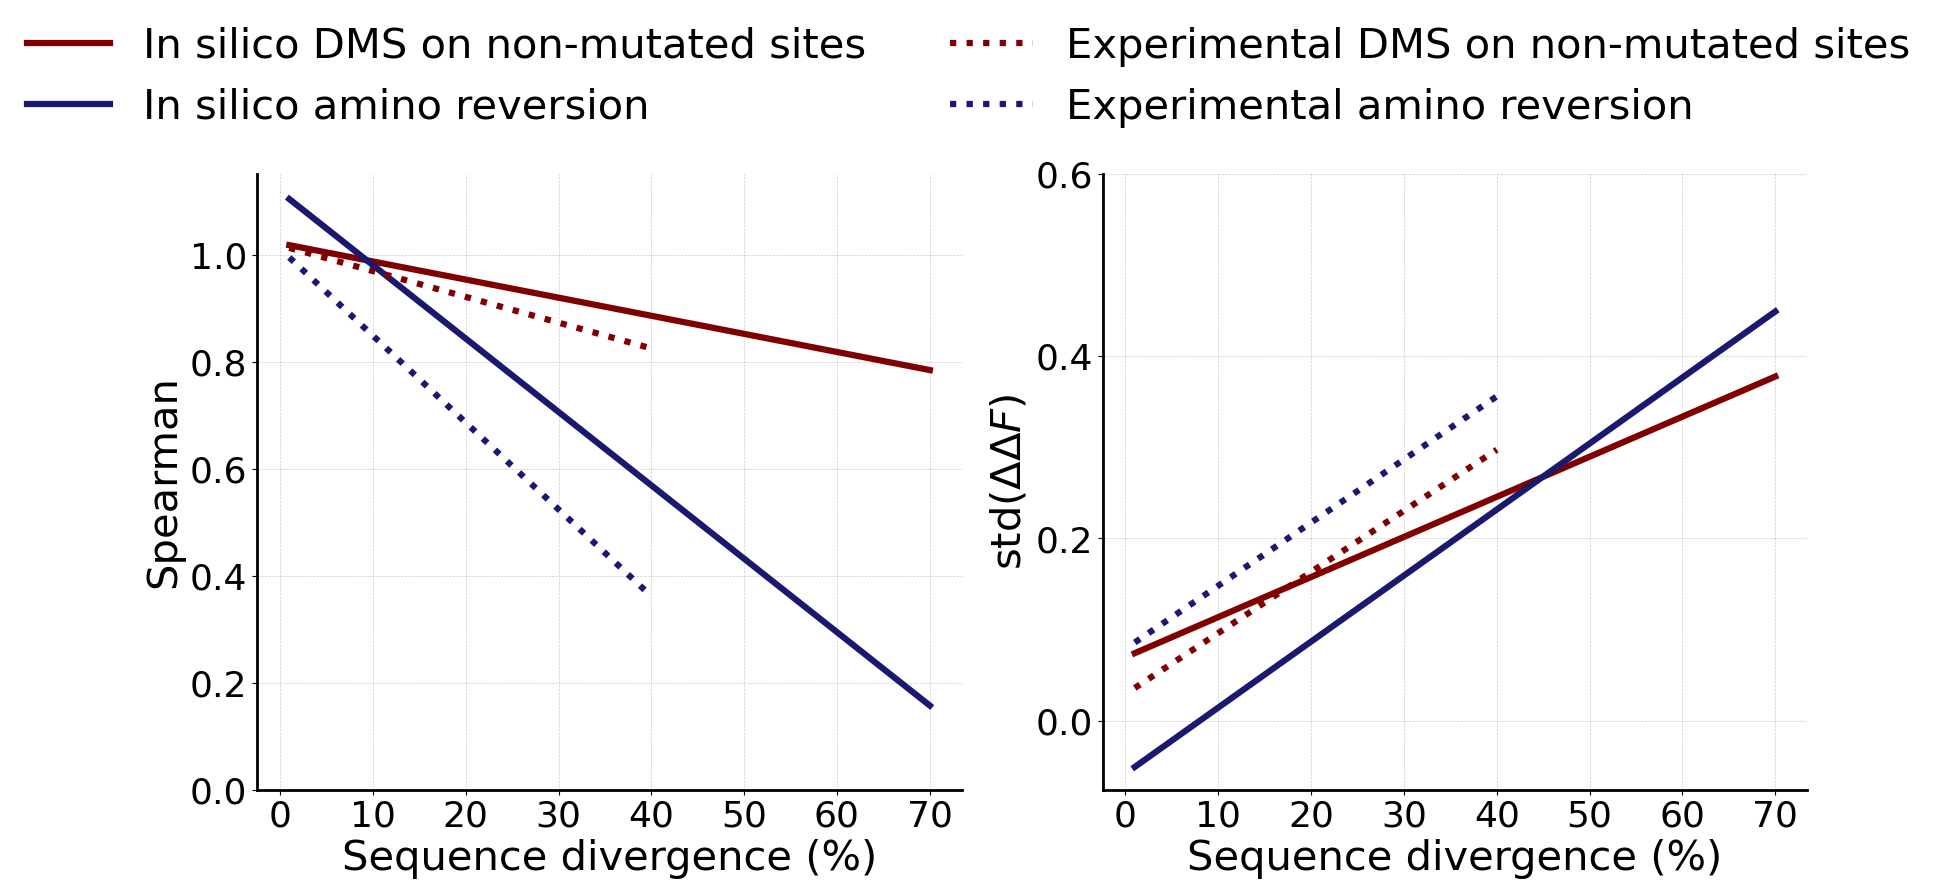

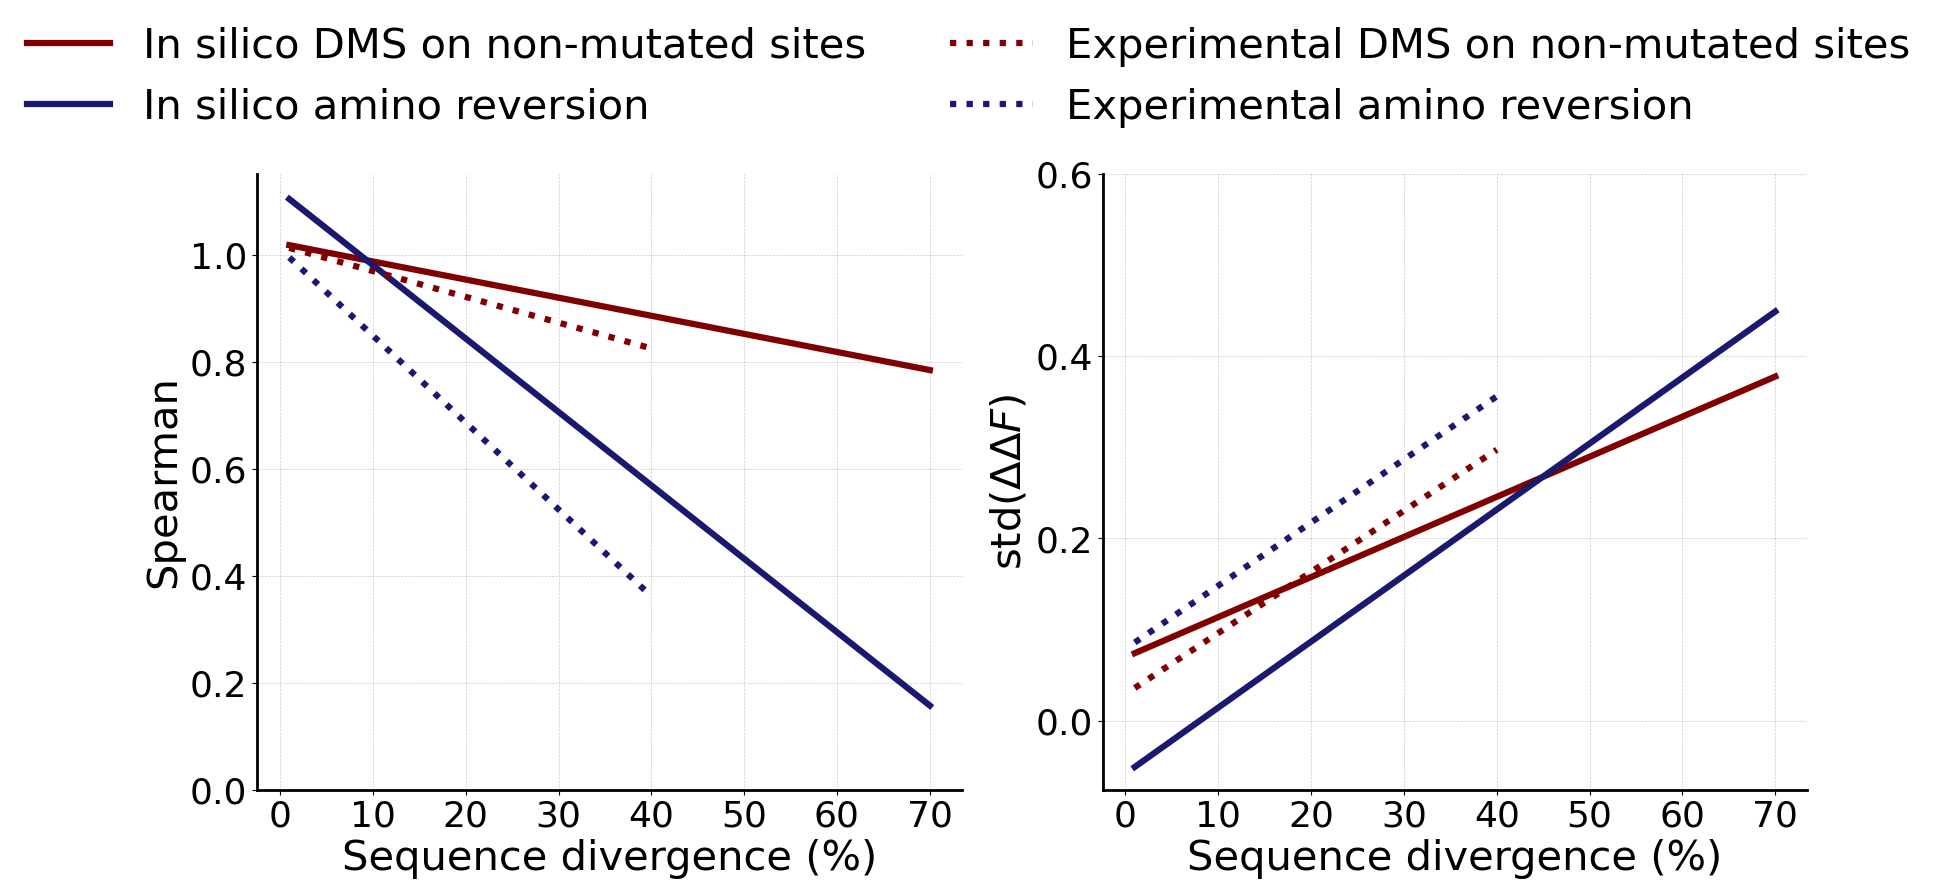

In [9]:
close("all")


axis_width = 2.

ticks_font = 26
axis_font = 30
spessore = 4.5
N_sites = 202
transp = 0.3

point = 150

cols = ["maroon", "midnightblue"]

lab1x = [-1.5, -1., - 0.5, 0, 0.5]
lab1y = lab1x

lab2x = [0,10,20,30, 40,50,60, 70]
lab2y = [1, 0.8, 0.6, 0.4, 0.2, 0]


lab3x = [0,10,20,30, 40,50,60, 70]
lab3y = [0, 0.2, 0.4, 0.6]

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(20)
shapex = 1
shapey = 2

ax2 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 0), colspan = 1, rowspan= 1)
ax3 = plt.subplot2grid(shape=(shapex, shapey), loc=(0, 1), colspan = 1, rowspan= 1)


ax2.plot(new_x, fit_nm, color=cols[1], linewidth = spessore, label="In silico DMS on non-mutated sites")
ax2.plot(new_x, fit_m, color=cols[2], linewidth = spessore, label= "In silico amino reversion")
ax2.plot(exp_x, fit_nm_exp, color=cols[1], linestyle =":",  linewidth = spessore, label="Experimental DMS on non-mutated sites")
ax2.plot(exp_x, fit_m_exp, color=cols[2], linestyle =":",  linewidth = spessore, label="Experimental amino reversion")

ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.grid(color="grey", linestyle="--", linewidth=0.5, alpha=0.4)
ax2.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax2.set_ylabel("Spearman", fontsize=axis_font)
ax2.set_xticks(lab2x)
ax2.set_yticks(lab2y)
ax2.set_xticklabels(lab2x, fontsize=ticks_font)
ax2.set_yticklabels(lab2y, fontsize=ticks_font)


# plotting subplots
ax3.plot(new_x, fits_nm, color=cols[1], linewidth = spessore, label="In silico DMS on non-mutated sites")
ax3.plot(new_x, fits_m, color=cols[2], linewidth = spessore, label="In silico amino reversion")
ax3.plot(exp_x,fits_m_exp, color=cols[2], linestyle =":",  linewidth = spessore, label=" Experimental amino reversion")
ax3.plot(exp_x, fits_nm_exp, color=cols[1], linestyle =":",  linewidth = spessore, label=" Experimental DMS on non-mutated sites")

ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xlabel("Sequence divergence (%)", fontsize=axis_font)
ax3.set_ylabel("std(\$\\Delta\$\$\\Delta{F}\$)", fontsize=axis_font)
ax3.set_xticks(lab3x)
ax3.set_yticks(lab3y)
ax3.set_xticklabels(lab3x, fontsize = ticks_font)
ax3.set_yticklabels(lab3y, fontsize = ticks_font)
ax2.legend(fontsize=axis_font, frameon=false, ncol = 2, bbox_to_anchor=(2.4, 1.3))
savefig("../data/figures/suppl_5CD.png", dpi = 300, bbox_inches="tight")
gcf()
